# **Reading Raw Data and Saving into Numpy**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import numpy as np
import os
import scipy.io as sio

# **Data Reading**

In [6]:
DrowD = np.load('/content/drive/MyDrive/Colab Notebooks/kamakshi/DrowD.npy')
label = np.load('/content/drive/MyDrive/Colab Notebooks/kamakshi/label.npy')
print("Shape of the Data: ", DrowD.shape)
print("Shape of the Label: ", label.shape)

Shape of the Data:  (2022, 30, 384)
Shape of the Label:  (2022, 1)


# **Pre-processing**

In [7]:
Data = [lst[:] for lst in DrowD]

Ndata=[]
for i in  range(len(Data)):
    std=np.std(Data[i],axis=1)
    mean=np.mean(Data[i],axis=1)
    Data[i]=(Data[i].transpose()-mean.transpose()).transpose()
    Data[i]=(Data[i].transpose()/std.transpose()).transpose()
    Ndata.append(Data[i])

Ndata = np.array(Ndata)
# for i in range(len(Ndata)):
#     print(np.array(Ndata[i]).shape)

In [10]:
#np.array(img_data_list).shape
segmented_data=[]
new_label = []
winSize=128*1 # Size of data point (data of 8 sec)
stride=128*1  # sliding window with length winSize and stride 1 sec


for j in range(len(Ndata)):
    count=0
    for i in range(0,np.shape(Ndata[j])[1]-winSize,stride):
        count+=1
        if len(np.shape(segmented_data))>1:
            segmented_data=np.dstack((segmented_data,Ndata[j][:,i:i+winSize]))
            new_label.append(label[j])
        else:
            segmented_data=np.reshape(Ndata[j][:,i:i+winSize],(30,np.shape(Ndata[j][:,i:i+winSize])[1],1))
            new_label.append(label[j])
    print(count)

2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2


In [11]:
np.shape(segmented_data)
# np.shape(new_label) (2022, 30, 384)

(30, 128, 4044)

In [13]:
new_Data = [lst[:] for lst in segmented_data]

N_data=[]
for i in  range(len(new_Data)):
    std=np.std(new_Data[i],axis=1)
    mean=np.mean(new_Data[i],axis=1)
    new_Data[i]=(new_Data[i].transpose()-mean.transpose()).transpose()
    new_Data[i]=(new_Data[i].transpose()/std.transpose()).transpose()
    N_data.append(new_Data[i])

N_data = np.array(N_data)
# for i in range(len(Ndata)):
#     print(np.array(Ndata[i]).shape)

In [14]:
N_data1 = np.transpose(N_data,(2,0,1)) #Ndata
N_data1.shape

(4044, 30, 128)

# **Splitting the Data into Training and Testing**

In [15]:
from tensorflow.keras.utils import to_categorical
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

num_classes = 2
Y = to_categorical(new_label, num_classes) #label
x,y = shuffle(N_data1, Y, random_state = 42) # Ndata
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.05, random_state = 20)
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (3841, 30, 128)
Shape of X_test: (203, 30, 128)
Shape of y_train: (3841, 2)
Shape of y_test: (203, 2)


In [16]:
def cbam_block(cbam_feature, ratio=8):
    cbam_feature = channel_attention(cbam_feature, ratio)
    cbam_feature = spatial_attention(cbam_feature)
    return cbam_feature

def channel_attention(input_feature, ratio=8):
    H, W, C = map(int, input_feature.get_shape()[1:])
    channel = C

    shared_layer_one = Dense(channel//ratio,
                             activation='relu',
                             kernel_initializer='he_normal',
                             use_bias=True,
                             bias_initializer='zeros')
    shared_layer_two = Dense(channel,
                             kernel_initializer='he_normal',
                             use_bias=True,
                             bias_initializer='zeros')

    avg_pool = GlobalAveragePooling2D()(input_feature)
    avg_pool = Reshape((1,1,channel))(avg_pool)
    #assert avg_pool._keras_shape[1:] == (1,1,channel)
    avg_pool = shared_layer_one(avg_pool)
    #assert avg_pool._keras_shape[1:] == (1,1,channel//ratio)
    avg_pool = shared_layer_two(avg_pool)
    #assert avg_pool._keras_shape[1:] == (1,1,channel)

    max_pool = GlobalMaxPooling2D()(input_feature)
    max_pool = Reshape((1,1,channel))(max_pool)
    #assert max_pool._keras_shape[1:] == (1,1,channel)
    max_pool = shared_layer_one(max_pool)
    #assert max_pool._keras_shape[1:] == (1,1,channel//ratio)
    max_pool = shared_layer_two(max_pool)
    #assert max_pool._keras_shape[1:] == (1,1,channel)

    cbam_feature = Add()([avg_pool,max_pool])
    cbam_feature = Activation('sigmoid')(cbam_feature)

    if K.image_data_format() == "channels_first":
        cbam_feature = Permute((3, 1, 2))(cbam_feature)

    return multiply([input_feature, cbam_feature])

def spatial_attention(input_feature):
    kernel_size = 7
    H, W, C = map(int, input_feature.get_shape()[1:])
    if K.image_data_format() == "channels_first":
        channel = C
        cbam_feature = Permute((2,3,1))(input_feature)
    else:
        channel = C
        cbam_feature = input_feature

    avg_pool = Lambda(lambda x: K.mean(x, axis=3, keepdims=True))(cbam_feature)
    #assert avg_pool._keras_shape[-1] == 1
    max_pool = Lambda(lambda x: K.max(x, axis=3, keepdims=True))(cbam_feature)
    #assert max_pool._keras_shape[-1] == 1
    concat = Concatenate(axis=3)([avg_pool, max_pool])
    #assert concat._keras_shape[-1] == 2
    cbam_feature = Conv2D(filters = 1,
                    kernel_size=kernel_size,
                    strides=1,
                    padding='same',
                    activation='sigmoid',
                    kernel_initializer='he_normal',
                    use_bias=False)(concat)
    #assert cbam_feature._keras_shape[-1] == 1

    if K.image_data_format() == "channels_first":
        cbam_feature = Permute((3, 1, 2))(cbam_feature)

    return multiply([input_feature, cbam_feature])

# MODEL - 1

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Add, Multiply, Concatenate, AveragePooling2D, Flatten, Reshape,DepthwiseConv2D
from tensorflow.keras.layers import SeparableConv2D, MaxPooling2D, Dense, GlobalAveragePooling2D,GlobalMaxPooling2D,Activation,multiply,Lambda
import keras
from tensorflow.keras import backend as K

visible = Input((30, 128, 1))
x1 = Conv2D(filters = 32, kernel_size = (1,3), strides = 1, activation = "relu")(visible)
x1 = MaxPooling2D(pool_size=(1, 2), strides=(1, 2))(x1)
x1 = Conv2D(filters = 32, kernel_size = (1,1), activation = "relu")(x1)
m1 = Conv2D(filters = 32, dilation_rate = 1, kernel_size = (1,3), padding = "same",  activation = "relu")(x1)
a1 = Add()([x1, m1])
m2 = Conv2D(filters = 32, dilation_rate = 2, kernel_size = (1,3), padding = "same",  activation = "relu")(a1)
a2 = Add()([x1, m1, m2])
m3 = Conv2D(filters = 32, dilation_rate = 3, kernel_size = (1,3), padding = "same",  activation = "relu")(a2)
a3 = Add()([x1, m1, m2, m3])
m4 = Conv2D(filters = 32, dilation_rate = 4, kernel_size = (1,3), padding = "same",  activation = "relu")(a3)
c2 = Concatenate()([m1, m2, m3, m4])
c2 = Conv2D(filters = 32, kernel_size = (1,1), activation = "relu")(m4)
a4 = Add()([x1, c2])
# g1 = GlobalAveragePooling2D()(a4)
c1 = cbam_block(a4,256)



x2 = Conv2D(filters = 64, kernel_size = (1,3), strides = 1, activation = "relu")(c1)
x2 = MaxPooling2D(pool_size=(1, 2), strides=(1, 2))(x2)
x2 = Conv2D(filters = 64, kernel_size = (1,1), activation = "relu")(x2)
m1 = Conv2D(filters = 64, dilation_rate = 1, kernel_size = (1,3), padding = "same",  activation = "relu")(x2)
a1 = Add()([x2, m1])
m2 = Conv2D(filters = 64, dilation_rate = 2, kernel_size = (1,3), padding = "same",  activation = "relu")(a1)
a2 = Add()([x2, m1, m2])
m3 = Conv2D(filters = 64, dilation_rate = 3, kernel_size = (1,3), padding = "same",  activation = "relu")(a2)
a3 = Add()([x2, m1, m2, m3])
m4 = Conv2D(filters = 64, dilation_rate = 4, kernel_size = (1,3), padding = "same",  activation = "relu")(a3)
c2 = Concatenate()([m1, m2, m3, m4])
c2 = Conv2D(filters = 64, kernel_size = (1,1), activation = "relu")(m4)
a4 = Add()([x2, c2])
# g2 = GlobalAveragePooling2D()(a4)
c1 = cbam_block(a4,256)

x3 = Conv2D(filters = 128, kernel_size = (1,3), strides = 1, activation = "relu")(c1)
x3 = MaxPooling2D(pool_size=(1, 2), strides=(1, 2))(x3)
x3 = Conv2D(filters = 128, kernel_size = (1,1), activation = "relu")(x3)
m1 = Conv2D(filters = 128, dilation_rate = 1, kernel_size = (1,3), padding = "same",  activation = "relu")(x3)
a1 = Add()([x3, m1])
m2 = Conv2D(filters = 128, dilation_rate = 2, kernel_size = (1,3), padding = "same",  activation = "relu")(a1)
a2 = Add()([x3, m1, m2])
m3 = Conv2D(filters = 128, dilation_rate = 3, kernel_size = (1,3), padding = "same",  activation = "relu")(a2)
a3 = Add()([x3, m1, m2, m3])
m4 = Conv2D(filters = 128, dilation_rate = 4, kernel_size = (1,3), padding = "same",  activation = "relu")(a3)
c2 = Concatenate()([m1, m2, m3, m4])
c2 = Conv2D(filters = 128, kernel_size = (1,1), activation = "relu")(m4)
a4 = Add()([x3, c2])

c1 = cbam_block(a4,256)
g3 = GlobalAveragePooling2D()(c1)

# x4 = Conv2D(filters = 128, kernel_size = (1,3), strides = 1, activation = "relu")(x3)
# x4 = MaxPooling2D(pool_size=(1, 2), strides=(1, 2))(x4)
# x4 = Conv2D(filters = 128, kernel_size = (1,1), activation = "relu")(x4)
# m1 = Conv2D(filters = 128, dilation_rate = 1, kernel_size = (1,3), padding = "same",  activation = "relu")(x4)
# a1 = Add()([x4, m1])
# m2 = Conv2D(filters = 128, dilation_rate = 2, kernel_size = (1,3), padding = "same",  activation = "relu")(a1)
# a2 = Add()([x4, m1, m2])
# m3 = Conv2D(filters = 128, dilation_rate = 3, kernel_size = (1,3), padding = "same",  activation = "relu")(a2)
# a3 = Add()([x4, m1, m2, m3])
# m4 = Conv2D(filters = 128, dilation_rate = 4, kernel_size = (1,3), padding = "same",  activation = "relu")(a3)
# c2 = Concatenate()([m1, m2, m3, m4])
# c2 = Conv2D(filters = 128, kernel_size = (1,1), activation = "relu")(c2)
# a4 = Add()([x4, c2])
# g4 = GlobalAveragePooling2D()(a4)

# C = Concatenate()([g1, g2, g3, g4])
# C = Concatenate()([g1, g2,g3])
x = Dense(512, activation='relu')(g3)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
output = Dense(2, activation='sigmoid')(x)
model = Model(inputs=visible, outputs=output)
opt = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=opt, loss= 'binary_crossentropy', metrics=["accuracy"])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 30, 128, 1)]         0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 30, 126, 32)          128       ['input_1[0][0]']             
                                                                                                  
 max_pooling2d (MaxPooling2  (None, 30, 63, 32)           0         ['conv2d[0][0]']              
 D)                                                                                               
                                                                                                  
 conv2d_1 (Conv2D)           (None, 30, 63, 32)           1056      ['max_pooling2d[0][0]']   

 add_5 (Add)                 (None, 30, 30, 64)           0         ['conv2d_9[0][0]',            
                                                                     'conv2d_10[0][0]']           
                                                                                                  
 conv2d_11 (Conv2D)          (None, 30, 30, 64)           12352     ['add_5[0][0]']               
                                                                                                  
 add_6 (Add)                 (None, 30, 30, 64)           0         ['conv2d_9[0][0]',            
                                                                     'conv2d_10[0][0]',           
                                                                     'conv2d_11[0][0]']           
                                                                                                  
 conv2d_12 (Conv2D)          (None, 30, 30, 64)           12352     ['add_6[0][0]']               
          

                                                                     'conv2d_19[0][0]',           
                                                                     'conv2d_20[0][0]']           
                                                                                                  
 conv2d_21 (Conv2D)          (None, 30, 14, 128)          49280     ['add_12[0][0]']              
                                                                                                  
 conv2d_22 (Conv2D)          (None, 30, 14, 128)          16512     ['conv2d_21[0][0]']           
                                                                                                  
 add_13 (Add)                (None, 30, 14, 128)          0         ['conv2d_17[0][0]',           
                                                                     'conv2d_22[0][0]']           
                                                                                                  
 global_av

In [ ]:
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test))


Epoch 1/100
228/228 [==============================] - 32s 139ms/step - loss: 0.6466 - accuracy: 0.6331 - val_loss: 0.6692 - val_accuracy: 0.6074
Epoch 2/100
228/228 [==============================] - 35s 154ms/step - loss: 0.6403 - accuracy: 0.6395 - val_loss: 0.6612 - val_accuracy: 0.6000
Epoch 3/100
228/228 [==============================] - 40s 176ms/step - loss: 0.6387 - accuracy: 0.6351 - val_loss: 0.6645 - val_accuracy: 0.5926
Epoch 4/100
228/228 [==============================] - 40s 175ms/step - loss: 0.6367 - accuracy: 0.6480 - val_loss: 0.6632 - val_accuracy: 0.6049
Epoch 5/100
228/228 [==============================] - 36s 156ms/step - loss: 0.6343 - accuracy: 0.6549 - val_loss: 0.6763 - val_accuracy: 0.5802
Epoch 6/100
228/228 [==============================] - 39s 170ms/step - loss: 0.6355 - accuracy: 0.6447 - val_loss: 0.6644 - val_accuracy: 0.5951
Epoch 7/100
228/228 [==============================] - 38s 167ms/step - loss: 0.6302 - accuracy: 0.6535 - val_loss: 0.6571 -

Epoch 57/100
228/228 [==============================] - 39s 171ms/step - loss: 0.4551 - accuracy: 0.7920 - val_loss: 0.6755 - val_accuracy: 0.6420
Epoch 58/100
228/228 [==============================] - 41s 178ms/step - loss: 0.4425 - accuracy: 0.8030 - val_loss: 0.6748 - val_accuracy: 0.6691
Epoch 59/100
228/228 [==============================] - 40s 176ms/step - loss: 0.4451 - accuracy: 0.8002 - val_loss: 0.6717 - val_accuracy: 0.6691
Epoch 60/100
228/228 [==============================] - 40s 174ms/step - loss: 0.4483 - accuracy: 0.7988 - val_loss: 0.7120 - val_accuracy: 0.6691
Epoch 61/100
228/228 [==============================] - 42s 182ms/step - loss: 0.4273 - accuracy: 0.8107 - val_loss: 0.7020 - val_accuracy: 0.6667
Epoch 62/100
228/228 [==============================] - 41s 181ms/step - loss: 0.4069 - accuracy: 0.8258 - val_loss: 0.7361 - val_accuracy: 0.6593
Epoch 63/100
228/228 [==============================] - 41s 182ms/step - loss: 0.4021 - accuracy: 0.8346 - val_loss: 0

In [ ]:
# Directly access training history attributes
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']


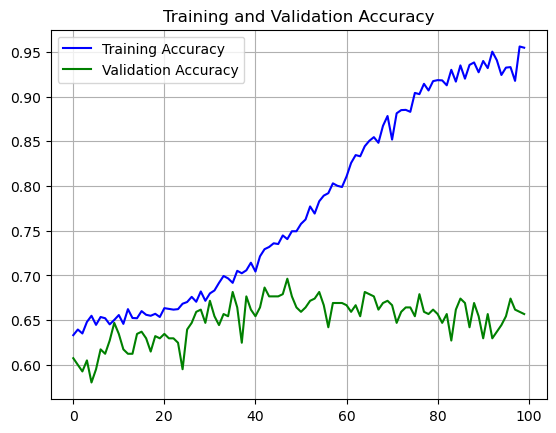

<Figure size 640x480 with 0 Axes>

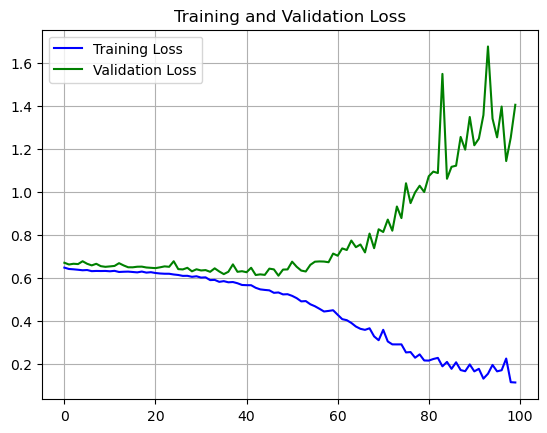

In [ ]:
import matplotlib.pyplot as plt
epochs = range(len(train_acc))
plt.plot(epochs, train_acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'g', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.grid()
plt.legend()
plt.figure()
plt.show()

plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.grid()
plt.legend()
plt.show()

# MODEL - 2

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Add, Multiply, Concatenate, AveragePooling2D, Flatten, DepthwiseConv2D
from tensorflow.keras.layers import SeparableConv2D, MaxPooling2D, Dense, GlobalAveragePooling2D

visible = Input((30, 384, 1))
x1 = Conv2D(filters = 32, kernel_size = (1,3), strides = 1, activation = "relu")(visible)
x1 = MaxPooling2D(pool_size=(1, 2), strides=(1, 2))(x1)
x1 = Conv2D(filters = 32, kernel_size = (1,1), activation = "relu")(x1)
m1 = Conv2D(filters = 32, dilation_rate = 1, kernel_size = (1,3), padding = "same",  activation = "relu")(x1)
a1 = Add()([x1, m1])
m2 = Conv2D(filters = 32, dilation_rate = 2, kernel_size = (1,3), padding = "same",  activation = "relu")(a1)
a2 = Add()([x1, m1, m2])
m3 = Conv2D(filters = 32, dilation_rate = 3, kernel_size = (1,3), padding = "same",  activation = "relu")(a2)
a3 = Add()([x1, m1, m2, m3])
m4 = Conv2D(filters = 32, dilation_rate = 4, kernel_size = (1,3), padding = "same",  activation = "relu")(a3)
c2 = Concatenate()([m1, m2, m3, m4])
c2 = Conv2D(filters = 32, kernel_size = (1,1), activation = "relu")(c2)
a4 = Add()([x1, c2])
g1 = GlobalAveragePooling2D()(a4)



x2 = Conv2D(filters = 64, kernel_size = (1,3), strides = 1, activation = "relu")(x1)
x2 = MaxPooling2D(pool_size=(1, 2), strides=(1, 2))(x2)
x2 = Conv2D(filters = 64, kernel_size = (1,1), activation = "relu")(x2)
m1 = Conv2D(filters = 64, dilation_rate = 1, kernel_size = (1,3), padding = "same",  activation = "relu")(x2)
a1 = Add()([x2, m1])
m2 = Conv2D(filters = 64, dilation_rate = 2, kernel_size = (1,3), padding = "same",  activation = "relu")(a1)
a2 = Add()([x2, m1, m2])
m3 = Conv2D(filters = 64, dilation_rate = 3, kernel_size = (1,3), padding = "same",  activation = "relu")(a2)
a3 = Add()([x2, m1, m2, m3])
m4 = Conv2D(filters = 64, dilation_rate = 4, kernel_size = (1,3), padding = "same",  activation = "relu")(a3)
c2 = Concatenate()([m1, m2, m3, m4])
c2 = Conv2D(filters = 64, kernel_size = (1,1), activation = "relu")(c2)
a4 = Add()([x2, c2])
g2 = GlobalAveragePooling2D()(a4)

x3 = Conv2D(filters = 128, kernel_size = (1,3), strides = 1, activation = "relu")(x2)
x3 = MaxPooling2D(pool_size=(1, 2), strides=(1, 2))(x3)
x3 = Conv2D(filters = 128, kernel_size = (1,1), activation = "relu")(x3)
m1 = Conv2D(filters = 128, dilation_rate = 1, kernel_size = (1,3), padding = "same",  activation = "relu")(x3)
a1 = Add()([x3, m1])
m2 = Conv2D(filters = 128, dilation_rate = 2, kernel_size = (1,3), padding = "same",  activation = "relu")(a1)
a2 = Add()([x3, m1, m2])
m3 = Conv2D(filters = 128, dilation_rate = 3, kernel_size = (1,3), padding = "same",  activation = "relu")(a2)
a3 = Add()([x3, m1, m2, m3])
m4 = Conv2D(filters = 128, dilation_rate = 4, kernel_size = (1,3), padding = "same",  activation = "relu")(a3)
c2 = Concatenate()([m1, m2, m3, m4])
c2 = Conv2D(filters = 128, kernel_size = (1,1), activation = "relu")(c2)
a4 = Add()([x3, c2])
g3 = GlobalAveragePooling2D()(a4)

x4 = Conv2D(filters = 128, kernel_size = (1,3), strides = 1, activation = "relu")(x3)
x4 = MaxPooling2D(pool_size=(1, 2), strides=(1, 2))(x4)
x4 = Conv2D(filters = 128, kernel_size = (1,1), activation = "relu")(x4)
m1 = Conv2D(filters = 128, dilation_rate = 1, kernel_size = (1,3), padding = "same",  activation = "relu")(x4)
a1 = Add()([x4, m1])
m2 = Conv2D(filters = 128, dilation_rate = 2, kernel_size = (1,3), padding = "same",  activation = "relu")(a1)
a2 = Add()([x4, m1, m2])
m3 = Conv2D(filters = 128, dilation_rate = 3, kernel_size = (1,3), padding = "same",  activation = "relu")(a2)
a3 = Add()([x4, m1, m2, m3])
m4 = Conv2D(filters = 128, dilation_rate = 4, kernel_size = (1,3), padding = "same",  activation = "relu")(a3)
c2 = Concatenate()([m1, m2, m3, m4])
c2 = Conv2D(filters = 128, kernel_size = (1,1), activation = "relu")(c2)
a4 = Add()([x4, c2])
g4 = GlobalAveragePooling2D()(a4)

C = Concatenate()([g1, g2, g3, g4])
x = Dense(512, activation='relu')(C)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
output = Dense(2, activation='sigmoid')(x)
model = Model(inputs=visible, outputs=output)
opt = keras.optimizers.RMSprop(learning_rate=0.0001)
model.compile(optimizer=opt, loss= 'binary_crossentropy', metrics=["accuracy"])
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 30, 384, 1)]         0         []                            
                                                                                                  
 conv2d_91 (Conv2D)          (None, 30, 382, 32)          128       ['input_5[0][0]']             
                                                                                                  
 max_pooling2d_13 (MaxPooli  (None, 30, 191, 32)          0         ['conv2d_91[0][0]']           
 ng2D)                                                                                            
                                                                                                  
 conv2d_92 (Conv2D)          (None, 30, 191, 32)          1056      ['max_pooling2d_13[0][0]

 conv2d_116 (Conv2D)         (None, 30, 22, 128)          49280     ['add_41[0][0]']              
                                                                                                  
 add_30 (Add)                (None, 30, 191, 32)          0         ['conv2d_92[0][0]',           
                                                                     'conv2d_93[0][0]',           
                                                                     'conv2d_94[0][0]',           
                                                                     'conv2d_95[0][0]']           
                                                                                                  
 add_34 (Add)                (None, 30, 94, 64)           0         ['conv2d_99[0][0]',           
                                                                     'conv2d_100[0][0]',          
                                                                     'conv2d_101[0][0]',          
          

 e)                                                                 ][0]',                        
                                                                     'global_average_pooling2d_10[
                                                                    0][0]',                       
                                                                     'global_average_pooling2d_11[
                                                                    0][0]',                       
                                                                     'global_average_pooling2d_12[
                                                                    0][0]']                       
                                                                                                  
 dense_14 (Dense)            (None, 512)                  180736    ['concatenate_13[0][0]']      
                                                                                                  
 dense_15 

In [ ]:
model.fit(X_train, y_train, epochs=100, batch_size=8, validation_data=(X_test, y_test))


Epoch 1/100
228/228 [==============================] - 69s 300ms/step - loss: 0.6933 - accuracy: 0.5041 - val_loss: 0.6980 - val_accuracy: 0.4680
Epoch 2/100
228/228 [==============================] - 69s 305ms/step - loss: 0.6918 - accuracy: 0.5157 - val_loss: 0.6945 - val_accuracy: 0.4680
Epoch 3/100
228/228 [==============================] - 68s 300ms/step - loss: 0.6872 - accuracy: 0.5498 - val_loss: 0.6795 - val_accuracy: 0.6749
Epoch 4/100
228/228 [==============================] - 70s 307ms/step - loss: 0.6688 - accuracy: 0.6064 - val_loss: 0.6641 - val_accuracy: 0.6207
Epoch 5/100
228/228 [==============================] - 70s 309ms/step - loss: 0.6479 - accuracy: 0.6399 - val_loss: 0.7501 - val_accuracy: 0.5074
Epoch 6/100
228/228 [==============================] - 71s 312ms/step - loss: 0.6457 - accuracy: 0.6344 - val_loss: 0.6432 - val_accuracy: 0.6453
Epoch 7/100
228/228 [==============================] - 72s 314ms/step - loss: 0.6369 - accuracy: 0.6427 - val_loss: 0.7184 -

Epoch 57/100
228/228 [==============================] - 76s 333ms/step - loss: 0.4835 - accuracy: 0.7713 - val_loss: 0.6741 - val_accuracy: 0.6552
Epoch 58/100
228/228 [==============================] - 76s 334ms/step - loss: 0.4726 - accuracy: 0.7867 - val_loss: 0.7611 - val_accuracy: 0.6305
Epoch 59/100
228/228 [==============================] - 76s 334ms/step - loss: 0.4656 - accuracy: 0.7812 - val_loss: 0.7098 - val_accuracy: 0.6552
Epoch 60/100
228/228 [==============================] - 76s 335ms/step - loss: 0.4577 - accuracy: 0.7812 - val_loss: 0.6997 - val_accuracy: 0.6108
Epoch 61/100
228/228 [==============================] - 76s 334ms/step - loss: 0.4475 - accuracy: 0.7922 - val_loss: 0.6818 - val_accuracy: 0.6552
Epoch 62/100
228/228 [==============================] - 76s 333ms/step - loss: 0.4340 - accuracy: 0.7949 - val_loss: 0.6666 - val_accuracy: 0.6207
Epoch 63/100
228/228 [==============================] - 76s 333ms/step - loss: 0.4425 - accuracy: 0.7949 - val_loss: 0

In [ ]:
# Directly access training history attributes
train_acc = model.history.history['accuracy']
val_acc = model.history.history['val_accuracy']
train_loss = model.history.history['loss']
val_loss = model.history.history['val_loss']


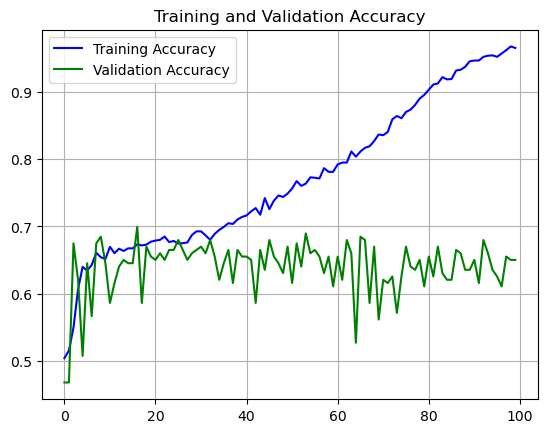

<Figure size 640x480 with 0 Axes>

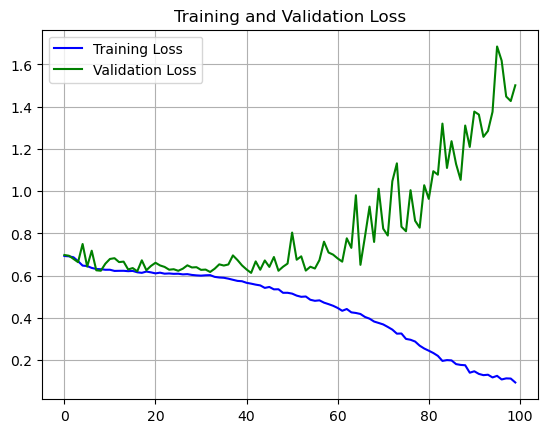

In [ ]:
import matplotlib.pyplot as plt
epochs = range(len(train_acc))
plt.plot(epochs, train_acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'g', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.grid()
plt.legend()
plt.figure()
plt.show()

plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.grid()
plt.legend()
plt.show()